In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
census_income = pd.read_csv("census-income.csv")

In [3]:
census_income.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
census_income.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'income'],
      dtype='object')

In [5]:
census_income.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

In [6]:
census_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
##  Replace all the missing values with NA. 
census_income.replace(" ?",np.NaN,inplace = True)

In [8]:
## Remove all the rows that contain NA values. 
census_income.dropna(axis = 0, inplace = True)

In [9]:
census_income["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [10]:
census_income["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

when dropping the na values, the "never worked" workclass was removed all together since they had "?" as their occupation

In [11]:
census_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
# a) Extract the “education” column and store it in “census_ed” . 
# b) Extract all the columns from “age” to “relationship” and store it in “census_seq”. 
# c) Extract the column number “5”, “8”, “11” and store it in “census_col”. 
# d) Extract all the male employees who work in state-gov and store it in “male_gov”. 
# e) Extract all the 39 year olds who either have a bachelor's degree or who are 
# native of the United States and store the result in “census_us”. 
# f) Extract 200 random rows from the “census” data frame and store it in “census_200”.

In [13]:
census_ed = census_income["education"]

In [14]:
census_seq = census_income.loc[:,"age":"relationship"]

In [15]:
census_col = census_income.iloc[:,[4,7,10]]

In [16]:
male_gov = census_income[(census_income["workclass"]==" State-gov") & (census_income["sex"]==" Male")]

In [17]:
census_us = census_income[(census_income["age"] == 39) & ((census_income["education"] == " Bachelors") | (census_income["native-country"] == " United-States"))]

In [18]:
census_200 = census_income.sample(200)

In [19]:
# g) Get the count of different levels of the “workclass” column. 
workclass_counts = census_income["workclass"].value_counts()
workclass_counts 

workclass
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64

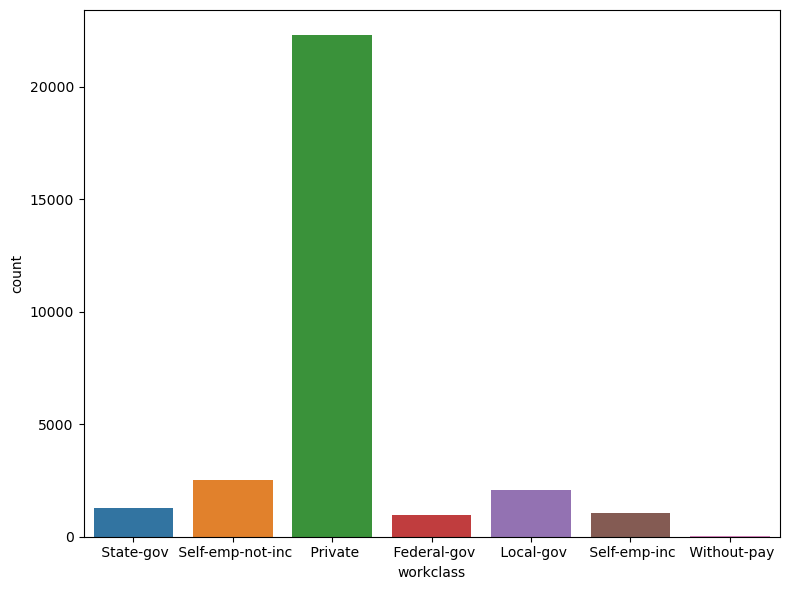

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data = census_income, x= "workclass")
plt.tight_layout()

In [21]:
# h) Calculate the mean of the “capital.gain” column grouped according to “workclass”. 

capital_gain_mean = census_income.groupby("workclass")["capital-gain"].mean()
capital_gain_mean

workclass
 Federal-gov          832.321315
 Local-gov            829.230285
 Private              879.858207
 Self-emp-inc        4810.746741
 Self-emp-not-inc    1913.134454
 State-gov            684.306489
 Without-pay          487.857143
Name: capital-gain, dtype: float64

In [22]:
# i) Create a separate dataframe with the details of males and females from the census 
# data that has income more than 50,000. 

census_50_over_male = census_income[(census_income["sex"] == " Male") & (census_income["income"] == " >50K")]
census_50_over_male

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32519,46,Private,364548,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32532,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [23]:
census_50_over_female = census_income[(census_income["sex"] == " Female") & (census_income["income"] == " >50K")]
census_50_over_female

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32513,46,Private,42972,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K
32536,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K


In [24]:
# j) Calculate the percentage of people from the United States who are private employees 
# and earn less than 50,000 annually.  

filter_conditions = census_income[(census_income["workclass"] == " Private") & (census_income["income"] == " <=50K") & (census_income["native-country"] == " United-States")]
percentage_private = len(filter_conditions)/len(census_income)*100
percentage_private

51.70081559578277

In [25]:
# k) Calculate the percentage of married people in the census data. 

Married_percentage = census_income[census_income["marital-status"].str.contains("Married")]["marital-status"].count()/census_income["marital-status"].count()*100
Married_percentage

47.92785624295471

In [26]:
# l) Calculate the percentage of high school graduates earning more than 50,000 
# annually.

filter_grad = census_income[(census_income["education"] == " HS-grad") & (census_income["income"] == " >50K")]

percentage_grad = len(filter_grad)/len(census_income)* 100
percentage_grad

5.361050328227571

## Linear Regression 



# 3. Linear Regression: 

### a) Build a simple linear regression model as follows: 

● Divide the dataset into training and test sets in 70:30 ratio. 
● Build a linear model on the test set where the dependent variable is “hours.per.week” and the independent variable is “education.num”. 
● Predict the values on the train set and find the error in prediction.  
● Find the root-mean-square error (RMSE).


In [27]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = census_income[["education-num"]]
y = census_income[["hours-per-week"]]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.30, random_state = 0)

Model = LinearRegression()
Model.fit(X_train, y_train)


LinearRegression()

In [28]:
## train figures 


train_prediction = Model.predict(X_train)
train_error = y_train - train_prediction
print(train_error)

## rmse train
print("")
print(f"The Mean squared error is {mean_squared_error(train_prediction, y_train)}" )
print(f"The RMSE is {np.sqrt(mean_squared_error(train_prediction, y_train))}" )

       hours-per-week
15977       -0.137610
13574       19.146752
23210       -8.137610
9284        19.146752
8841        11.146752
...               ...
14169       -5.147076
21206        6.284200
10646        1.999838
11687       16.999838
2976        -5.137610

[21113 rows x 1 columns]

The Mean squared error is 137.76014309500732
The RMSE is 11.737126696726389


In [29]:
## test figures 


test_prediction = Model.predict(X_test)
test_error = y_test - test_prediction
print(test_error)

## rmse test
print("")
print(f"The Mean squared error is {mean_squared_error(test_prediction, y_test)}" )
print(f"The RMSE is {np.sqrt(mean_squared_error(test_prediction, y_test))}" )

       hours-per-week
2135        -0.137610
15639      -20.853248
29059       -0.853248
27523        7.431114
9280        -0.853248
...               ...
16826       -0.137610
25246       13.440580
18980        7.862390
953        -20.137610
30925       -0.853248

[9049 rows x 1 columns]

The Mean squared error is 145.81515723280097
The RMSE is 12.075394702981802


In [30]:
census_income["hours-per-week"].mean()
## the mean working hours is 40 so 12 hours is more than 25 percent error which is substantial!!

40.93123798156621

## 4. Logistic Regression: 
a) Build a simple logistic regression model as follows: 
● Divide the dataset into training and test sets in 65:35 ratio. 
● Build a logistic regression model where the dependent variable is 
“X”(yearly income) and the independent variable is “occupation”. 
● Predict the values on the test set. 
● Build a confusion matrix and find the accuracy.

In [31]:
census_income["occupation"].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



lenc = LabelEncoder()
census_income["income"] = lenc.fit_transform(census_income["income"])

X= census_income[["occupation"]] ## double braces because ohe expects a 2d array 
y = census_income["income"] 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.35, random_state = 42)


## standardsclar not needed because just on einpit column
## OHE since the occupation is a nominal categorical column

ohe = OneHotEncoder(drop = "first")
X_train = ohe.fit_transform(X_train)
X_test =ohe.transform(X_test)


Model = LogisticRegression()
Model.fit(X_train, y_train)
predictions = Model.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


### the model is performing very bad even though the score is 75 percent because it is an unbalanced target label
### and the model has just predicted all outputs to be zero 

print(predictions.sum()) ## all are zeros 

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      7882
           1       0.00      0.00      0.00      2675

    accuracy                           0.75     10557
   macro avg       0.37      0.50      0.43     10557
weighted avg       0.56      0.75      0.64     10557

[[7882    0]
 [2675    0]]
0.7466136212939282
0


## Multiple Logistic Regression 

● Divide the dataset into training and test sets in 80:20 ratio. 
● Build a logistic regression model where the dependent variable is 
“X”(yearly income) and independent variables are “age”, “workclass”, and 
“education”. 
● Predict the values on the test set. 
● Build a confusion matrix and find the accuracy. 

In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# lenc = LabelEncoder()
# census_income["income"] = lenc.fit_transform(census_income["income"])

X= census_income[["age", "workclass", "education" ]] ## double braces because ohe expects a 2d array 
y = census_income["income"]  


X = pd.get_dummies(X, columns = ["workclass","education"],drop_first = True )

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)


Model = LogisticRegression()
Model.fit(X_train, y_train)
predictions = Model.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


## the accuracy has improved and we get some precision and recall for the 1 label class

              precision    recall  f1-score   support

           0       0.79      0.95      0.87      4503
           1       0.65      0.28      0.39      1530

    accuracy                           0.78      6033
   macro avg       0.72      0.61      0.63      6033
weighted avg       0.76      0.78      0.74      6033

[[4277  226]
 [1106  424]]
0.7792143212332173


In [34]:
## same thing but just using column transformer for practice 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer



# lenc = LabelEncoder()
# census_income["income"] = lenc.fit_transform(census_income["income"])

X= census_income[["age", "workclass", "education" ]] ## double braces because ohe expects a 2d array 
y = census_income["income"]  



X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)

## we can see that here we need OHE for workclass and education 
transformer = ColumnTransformer( transformers = [
    ("tnf1", OneHotEncoder(drop = "first", sparse = False), ["workclass", "education" ])
], remainder = "passthrough")

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)



Model = LogisticRegression()
Model.fit(X_train, y_train)
predictions = Model.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


## the accuracy has improved and we get some precision and recall for the 1 label class

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4503
           1       0.65      0.26      0.38      1530

    accuracy                           0.78      6033
   macro avg       0.72      0.61      0.62      6033
weighted avg       0.76      0.78      0.74      6033

[[4283  220]
 [1126  404]]
0.7768937510359688


## 5. Decision Tree: 
a) Build a decision tree model as follows: 
● Divide the dataset into training and test sets in 70:30 ratio. 
● Build a decision tree model where the dependent variable is “X”(Yearly Income) 
and the rest of the variables as independent variables. 
● Predict the values on the test set. 
● Build a confusion matrix and calculate the accuracy. 


In [35]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

# lenc = LabelEncoder()
# census_income["income"] = lenc.fit_transform(census_income["income"])

y = census_income["income"]  
X = census_income.drop(columns = ["income"], axis = 1)


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)


## we can see that here we need OHE for workclass and education 
transformer = ColumnTransformer( transformers = [
    ("tnf1", OneHotEncoder(drop = "first", sparse = False), ["workclass", "education", "marital-status","sex", "race"
                                                             , "occupation", "native-country", "relationship"])
], remainder = "passthrough")


X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

predictions = dt.predict(X_test)


print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


## the performance has improved a lot and specifically the precision and recall of the 1 class


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6767
           1       0.62      0.64      0.63      2282

    accuracy                           0.81      9049
   macro avg       0.75      0.75      0.75      9049
weighted avg       0.81      0.81      0.81      9049

[[5866  901]
 [ 826 1456]]
0.8091501823405901


## 6. Random Forest: 
### a) Build a random forest model as follows: 
● Divide the dataset into training and test sets in 80:20 ratio. 
● Build a random forest model where the dependent variable is “X”(Yearly Income) 
and the rest of the variables as independent variables and number of trees as 
300. 
● Predict values on the test set 
● Build a confusion matrix and calculate the accuracy 

In [36]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

# lenc = LabelEncoder()
# census_income["income"] = lenc.fit_transform(census_income["income"])

y = census_income["income"]  
X = census_income.drop(columns = ["income"], axis = 1)


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)


## we can see that here we need OHE for workclass and education 
transformer = ColumnTransformer( transformers = [
    ("tnf1", OneHotEncoder(drop = "first", sparse = False), ["workclass", "education", "marital-status","sex", "race"
                                                             , "occupation", "native-country", "relationship"])
], remainder = "passthrough")


X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


rf = RandomForestClassifier(n_estimators = 300)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

## metrics 


print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

## the performance has imrpoved even more 

## also I tried with education as ordinal columns following a relation that more educated can get higher salaries but the 
## f1 score went down and the precision for class 1 went down 


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6767
           1       0.74      0.63      0.68      2282

    accuracy                           0.85      9049
   macro avg       0.81      0.78      0.79      9049
weighted avg       0.85      0.85      0.85      9049

[[6256  511]
 [ 836 1446]]
0.8511437727925738


In [37]:
### Now let's try the same thing with education as ordinal rather than a nominal category 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


# lenc = LabelEncoder()
# census_income["income"] = lenc.fit_transform(census_income["income"])

y = census_income["income"]  
X = census_income.drop(columns = ["income"], axis = 1)


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)


## we can see that here we need OHE for workclass and education 
transformer = ColumnTransformer( transformers = [
    ("tnf1", OneHotEncoder(drop = "first", sparse = False), ["workclass", "marital-status","sex", "race"
                                                             , "occupation", "native-country", "relationship"]),
    ("tnf2", OrdinalEncoder(categories = [[" Preschool", " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th",
                                          " HS-grad", " Some-college", " Assoc-voc"," Assoc-acdm", " Bachelors", " Masters",
                                          " Prof-school"," Doctorate"]]), ["education"])
], remainder = "passthrough")


X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


rf = RandomForestClassifier(n_estimators = 300)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

## metrics 


print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


## The performance has improved with precision and recall both improving for both classes.

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6767
           1       0.74      0.64      0.69      2282

    accuracy                           0.85      9049
   macro avg       0.81      0.78      0.79      9049
weighted avg       0.85      0.85      0.85      9049

[[6250  517]
 [ 821 1461]]
0.8521383578295945


In [38]:
census_income["income"].value_counts()

income
0    22654
1     7508
Name: count, dtype: int64

## RANDOM FOREST WITH HYPER PARAMTER TUNING

In [39]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


# lenc = LabelEncoder()
# census_income["income"] = lenc.fit_transform(census_income["income"])

y = census_income["income"]  
X = census_income.drop(columns = ["income"], axis = 1)



X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)


## we can see that here we need OHE for workclass and education 
transformer = ColumnTransformer( transformers = [
    ("tnf1", OneHotEncoder(drop = "first", sparse = False), ["workclass", "marital-status","sex", "race"
                                                             , "occupation", "native-country", "relationship"]),
    ("tnf2", OrdinalEncoder(categories = [[" Preschool", " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th",
                                          " HS-grad", " Some-college", " Assoc-voc"," Assoc-acdm", " Bachelors", " Masters",
                                          " Prof-school"," Doctorate"]]), ["education"])
], remainder = "passthrough")


X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


parameters = { 
    "criterion" : ["gini", "entropy", "log_loss"],
    "n_estimators" : [100,200,300,500,1000],
    "max_depth" : [1,2,3],
    "max_features" : ["sqrt", "log2"]
}


rf = RandomForestClassifier()
Cv = GridSearchCV(estimator = rf, param_grid = parameters, cv = 5, verbose = 2, scoring =  "balanced_accuracy")

Cv.fit(X_train, y_train)


predictions = Cv.predict(X_test)

## metrics 


print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

## the performance has imrpoved even more 

## also I tried with education as ordinal columns following a relation that more educated can get higher salaries but the 
## f1 score went down and the precision for class 1 went down 


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, n_estimators=200; total time=   0.6

[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=300; total time=   1.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=300; total time=   1.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=300; total time=   1.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=500; total time=   1.8s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=500; total time=   1.9s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=500; total time=   2.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=500; total time=   1.9s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=500; total time=   1.9s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=1000; total time=   3.7s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=1000; total time=   3.9s
[CV] END criterion=gini, max_depth=2, max_features=log2, n

[CV] END criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=1000; total time=   3.7s
[CV] END criterion=entropy, max_depth=1, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=1, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=1, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=1, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=1, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=1, max_features=log2, n_estimators=200; total time=   0.5s
[CV] END criterion=entropy, max_depth=1, max_features=log2, n_estimators=200; total time=   0.5s
[CV] END criterion=entropy, max_depth=1, max_features=log2, n_estimators=200; total time=   0.5s
[CV] END criterion=entropy, max_depth=1, max_features=log2, n_estimators=200; total time=   0.6s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=200; total time=   1.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=300; total time=   1.6s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=300; total time=   1.6s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=300; total time=   1.7s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=300; total time=   1.5s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=300; total time=   1.6s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500; total time=   2.6s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500; total time=   2.6s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500; total time=   2.6s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500; total time=   2.7s
[CV] END criterion=entropy, ma

[CV] END criterion=log_loss, max_depth=1, max_features=log2, n_estimators=500; total time=   1.5s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, n_estimators=500; total time=   1.5s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, n_estimators=1000; total time=   3.0s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, n_estimators=1000; total time=   3.2s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, n_estimators=1000; total time=   2.9s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, n_estimators=1000; total time=   3.0s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, n_estimators=1000; total time=   2.9s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END criter

[CV] END criterion=log_loss, max_depth=3, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=3, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=3, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=3, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END criterion=log_loss, max_depth=3, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END criterion=log_loss, max_depth=3, max_features=log2, n_estimators=200; total time=   0.8s
[CV] END criterion=log_loss, max_depth=3, max_features=log2, n_estimators=200; total time=   0.8s
[CV] END criterion=log_loss, max_depth=3, max_features=log2, n_estimators=200; total time=   0.8s
[CV] END criterion=log_loss, max_depth=3, max_features=log2, n_estimators=300; total time=   1.3s
[CV] END criterion=log_loss, max_depth=3, max_features=log2, n_estimators=300; total time=   1.3s
[CV] END criterion=l

In [40]:
# best_parameteres_balanced = Cv.best_params_
best_parameteres_balanced

NameError: name 'best_parameteres_balanced' is not defined

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


# lenc = LabelEncoder()
# census_income["income"] = lenc.fit_transform(census_income["income"])

y = census_income["income"]  
X = census_income.drop(columns = ["income"], axis = 1)


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)


## we can see that here we need OHE for workclass and education 
transformer = ColumnTransformer( transformers = [
    ("tnf1", OneHotEncoder(drop = "first", sparse = False), ["workclass", "education", "marital-status","sex", "race"
                                                             , "occupation", "native-country", "relationship"])
], remainder = "passthrough")


X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


parameters = { 
    "criterion" : ["gini", "entropy", "log_loss"],
    "n_estimators" : [100,200,300,500,1000],
    "max_depth" : [1,2,3],
    "max_features" : ["sqrt", "log2"]
}


rf = RandomForestClassifier()
Cv = GridSearchCV(estimator = rf, param_grid = parameters, cv = 5, verbose = 2, scoring =  "accuracy")

Cv.fit(X_train, y_train)


predictions = Cv.predict(X_test)

## metrics 


print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

## the performance has imrpoved even more 

## also I tried with education as ordinal columns following a relation that more educated can get higher salaries but the 
## f1 score went down and the precision for class 1 went down 


## ADABOOST CLASSIFIER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# lenc = LabelEncoder()
# census_income["income"] = lenc.fit_transform(census_income["income"])

y = census_income["income"]  
X = census_income.drop(columns = ["income"], axis = 1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


transformer = ColumnTransformer(
    transformers=[
        ("tnf1", OneHotEncoder(drop="first", sparse=False), 
         ["workclass", "marital-status", "sex", "race", "occupation", "native-country", "relationship"]),
        ("tnf2", OrdinalEncoder(categories=[[" Preschool", " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", 
                                             " 11th", " 12th", " HS-grad", " Some-college", " Assoc-voc", 
                                             " Assoc-acdm", " Bachelors", " Masters", " Prof-school", " Doctorate"]]), 
         ["education"])
    ],
    remainder="passthrough"
)


X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


adaboost = AdaBoostClassifier(n_estimators=300, random_state=42)
adaboost.fit(X_train, y_train)


predictions = adaboost.predict(X_test)


print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

## ADABOOST WITH HYPER PARAMETER TUNING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# lenc = LabelEncoder()
# census_income["income"] = lenc.fit_transform(census_income["income"])

y = census_income["income"]  
X = census_income.drop(columns = ["income"], axis = 1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


transformer = ColumnTransformer(
    transformers=[
        ("tnf1", OneHotEncoder(drop="first", sparse=False), 
         ["workclass", "marital-status", "sex", "race", "occupation", "native-country", "relationship"]),
        ("tnf2", OrdinalEncoder(categories=[[" Preschool", " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", 
                                             " 11th", " 12th", " HS-grad", " Some-college", " Assoc-voc", 
                                             " Assoc-acdm", " Bachelors", " Masters", " Prof-school", " Doctorate"]]), 
         ["education"])
    ],
    remainder="passthrough"
)

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


parameters = { 
    "n_estimators" : [1,10,100,200,300,500,1000],
    "learning_rate" : [0.00001, 0.0001, 0.001, 0.01, 0.1],
    "algorithm" : ['SAMME.R', 'SAMME']
}

ab = AdaBoostClassifier()
cv = GridSearchCV(estimator=ab, param_grid = parameters,cv = 10, verbose = 5, scoring= "accuracy")

cv.fit(X_train, y_train)


predictions = cv.predict(X_test)


print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

In [ ]:
print("Best Parameters:", cv.best_params_)
Best_paramters_adaboost = cv.best_params_

In [ ]:
## best accuracy till now = 86.29 

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


y = census_income["income"]  
X = census_income.drop(columns=["income"], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


transformer = ColumnTransformer(
    transformers=[
        ("tnf1", OneHotEncoder(drop="first", sparse=False), 
         ["workclass", "marital-status", "sex", "race", "occupation", "native-country", "relationship"]),
        ("tnf2", OrdinalEncoder(categories=[[" Preschool", " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", 
                                             " 11th", " 12th", " HS-grad", " Some-college", " Assoc-voc", 
                                             " Assoc-acdm", " Bachelors", " Masters", " Prof-school", " Doctorate"]]), 
         ["education"])
    ],
    remainder="passthrough"
)


X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


gb = GradientBoostingClassifier(n_estimators=100, random_state=42)


gb.fit(X_train, y_train)


predictions = gb.predict(X_test)


print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


## Gradient Boosting with Hyperparamter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


y = census_income["income"]  
X = census_income.drop(columns=["income"], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


transformer = ColumnTransformer(
    transformers=[
        ("tnf1", OneHotEncoder(drop="first", sparse=False), 
         ["workclass", "marital-status", "sex", "race", "occupation", "native-country", "relationship"]),
        ("tnf2", OrdinalEncoder(categories=[[" Preschool", " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", 
                                             " 11th", " 12th", " HS-grad", " Some-college", " Assoc-voc", 
                                             " Assoc-acdm", " Bachelors", " Masters", " Prof-school", " Doctorate"]]), 
         ["education"])
    ],
    remainder="passthrough"
)


X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)


parameters = { 
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "subsample": [0.8, 0.9, 1.0],
    "min_samples_split": [2, 5, 10]
}


gb = GradientBoostingClassifier()


cv = GridSearchCV(estimator=gb, param_grid=parameters, cv=10, verbose=5, scoring="accuracy")
cv.fit(X_train, y_train)


predictions = cv.predict(X_test)


print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


In [ ]:
print("Best Parameters:", cv.best_params_)
Best_paramters_gradientboosting = cv.best_params_

## XGBOOST Classifier 

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


y = census_income["income"]  
X = census_income.drop(columns=["income"], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


transformer = ColumnTransformer(
    transformers=[
        ("tnf1", OneHotEncoder(drop="first", sparse=False), 
         ["workclass", "marital-status", "sex", "race", "occupation", "native-country", "relationship"]),
        ("tnf2", OrdinalEncoder(categories=[[" Preschool", " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", 
                                             " 11th", " 12th", " HS-grad", " Some-college", " Assoc-voc", 
                                             " Assoc-acdm", " Bachelors", " Masters", " Prof-school", " Doctorate"]]), 
         ["education"])
    ],
    remainder="passthrough"
)


X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

# Initializing XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Fitting the model
xgb.fit(X_train, y_train)

# Making predictions
predictions = xgb.predict(X_test)

# Model evaluation
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


## XGBOOST Classifier with HyperParamter Tuning

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

# Target variable and features
y = census_income["income"]  
X = census_income.drop(columns=["income"], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining column transformer for preprocessing
transformer = ColumnTransformer(
    transformers=[
        ("tnf1", OneHotEncoder(drop="first", sparse=False), 
         ["workclass", "marital-status", "sex", "race", "occupation", "native-country", "relationship"]),
        ("tnf2", OrdinalEncoder(categories=[[" Preschool", " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", 
                                             " 11th", " 12th", " HS-grad", " Some-college", " Assoc-voc", 
                                             " Assoc-acdm", " Bachelors", " Masters", " Prof-school", " Doctorate"]]), 
         ["education"])
    ],
    remainder="passthrough"
)

# Applying transformations
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

# Defining parameter grid for GridSearchCV
parameters = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0]
}

# Initializing XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Grid search with cross-validation
cv = GridSearchCV(estimator=xgb, param_grid=parameters, cv=10, verbose=5, scoring="accuracy")
cv.fit(X_train, y_train)

# Making predictions
predictions = cv.predict(X_test)

# Model evaluation
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


In [ ]:
print("Best Parameters:", cv.best_params_)
Best_paramters_XGboost = cv.best_params_